# Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart-disease based on their medical attributes.

We are going to take the following approach: 
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In the statement
> Given the clinical parameters of a patient, can we be able to classify whether the person has heart-disease or not.

## 2. Data 
The data that we are using comes from Cleaveland data from the uci machine learning repository. https://archive.ics.uci.edu/dataset/45/heart+disease

The same version of the data can also be taken from kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation
Evaluation means what defines success for us. This is where we decide whether we would take up the project or not. It is a crucial step because we do not know if our machine learning model would be able to find the pattern in the given set of data.

> Say, if during the proof of concept we are able to achieve an accuracy of 95%, then only would we be taking the project.

## 4. Features 
This is where we would get the information about the features in the data. As mentioned in the uci datasheet doc, "This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them."

The 14 attributes (with their meaning) are:
* **id** (Unique id for each patient)
* **age** (Age of the patient in years)
* **origin** (place of study)
* **sex** (Male = 1/Female = 0)
* **cp** chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* **trestbps** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* **chol** (serum cholesterol in mg/dl)
* **fbs** (if fasting blood sugar > 120 mg/dl)
* **restecg** (rest electrocardiographic results) Values: ([normal, stt abnormality, lv hypertrophy])
* **thalach**: maximum heart rate achieved
* **exang**: exercise-induced angina (True/ False)
* **oldpeak**: ST depression induced by exercise relative to rest
* **slope**: the slope of the peak exercise ST segment
* **ca**: number of major vessels (0-3) colored by fluoroscopy
* **thal**: [normal; fixed defect; reversible defect]
* **num**: the predicted attribute    

## Preparing the tools

We are going to use numpy, pandas and matplotlib for data handlling and manipulation

In [1]:
# Importing all the tools we need

# Regular EDA (exploratory data analysi) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We need our plots to be displayed in this notebook
%matplotlib inline

# models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

### Data Exploration (Exploratory Data Analysis or EDA)

The goal here is to find more about the data and become a subject matter on the dataset you are workinh with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different kind of data
3. Whats missing from the data and how do you deal with it?
4. What are the outliers and why should you care about them? (Outliers: Some data that has exceptional value than the rest of the data)
5. How can you add, change, or remove features to get more out of your data

In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df["target"].value_counts()

# we see that the data of both classes are almost equal. Thus, we have a balanced data

target
1    165
0    138
Name: count, dtype: int64

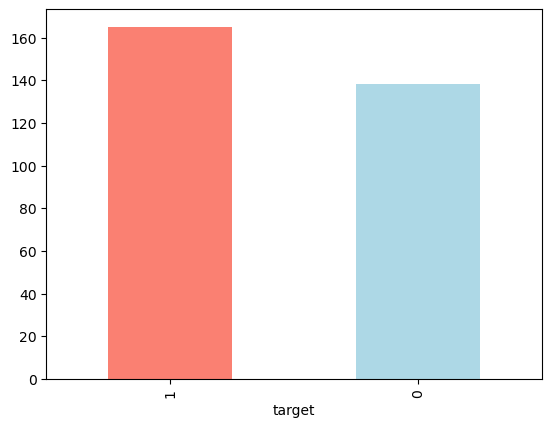

In [7]:
df["target"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

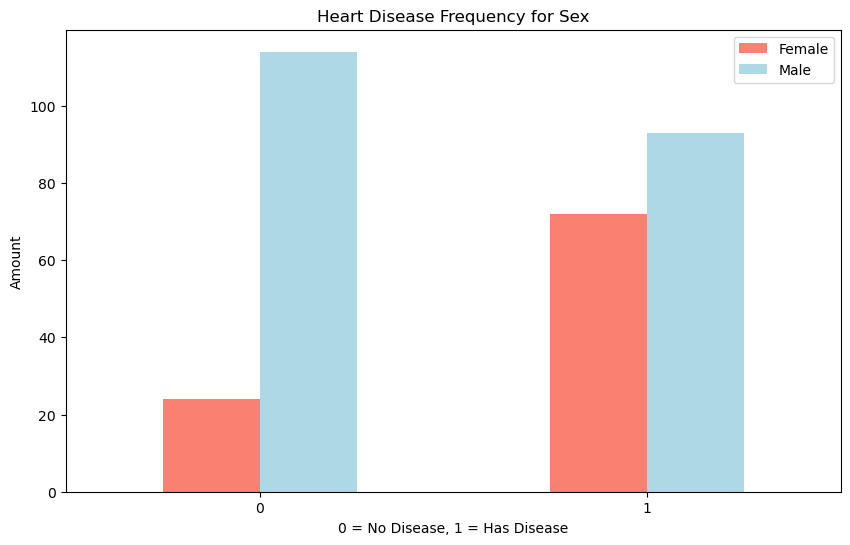

In [10]:
pd.crosstab(df.target, df.sex).plot(kind = "bar", color = ["salmon", "lightblue"], figsize = (10, 6));
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Has Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

### Age vs Max heart rate for heart disease

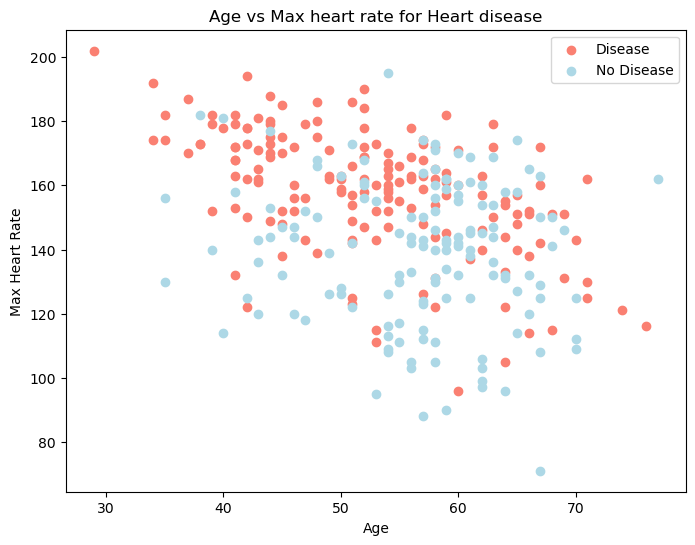

In [11]:
plt.figure(figsize = (8, 6))

plt.scatter(df.age[df["target"] == 1],
            df.thalach[df["target"] == 1],
           c = "salmon")
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target == 0],
           c = "lightblue")
plt.title("Age vs Max heart rate for Heart disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

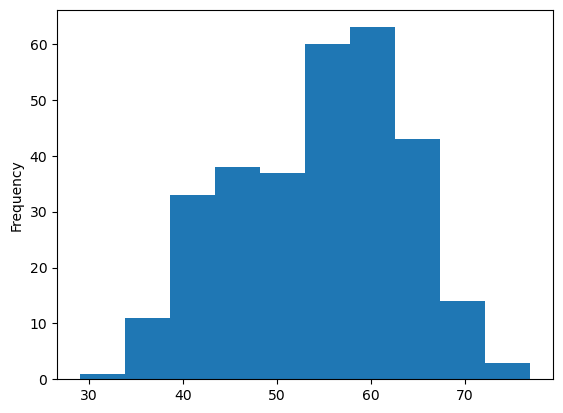

In [12]:
### Distribution of Age is given using histogram
# Distribution helps in determining outliers. 

df.age.plot.hist();

### cp vs target

In [13]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


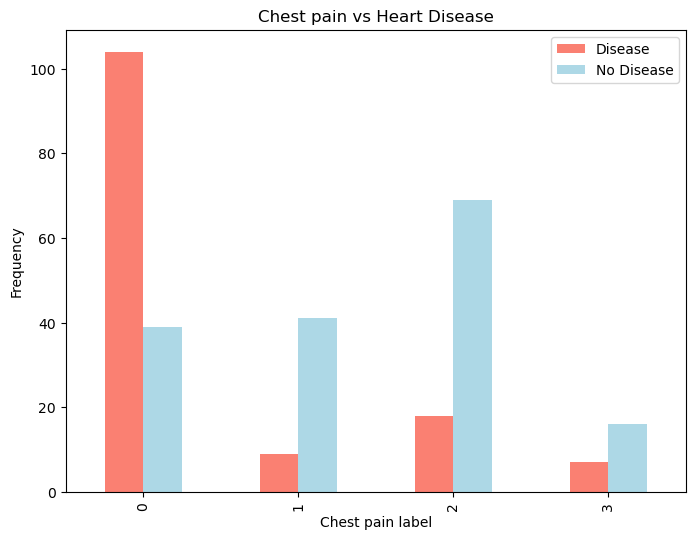

In [14]:
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                  figsize = (8, 6),
                                  color = ["salmon", "lightblue"]);


plt.title("Chest pain vs Heart Disease")
plt.xlabel("Chest pain label")
plt.ylabel("Frequency")
plt.legend(["Disease", "No Disease"]);

In [15]:
# visualising the data using the correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


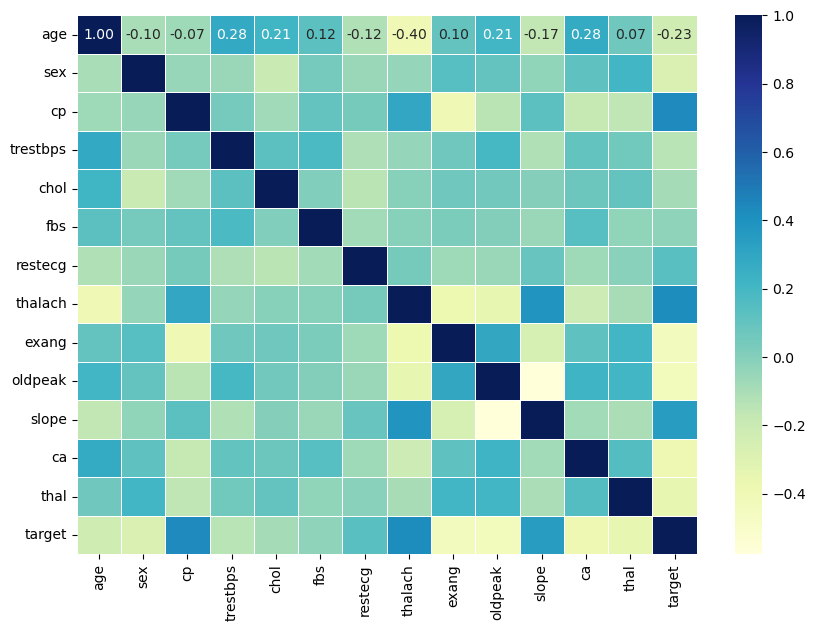

In [16]:
# visualising the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (10, 7))
ax = sns.heatmap(corr_matrix, 
                annot = True,
                linewidths = 0.5,
                fmt = ".2f",
                cmap = "YlGnBu");

## Modelling

In [17]:
X = df.drop("target", axis = 1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Now we have got our data split into training and test sets, its time to build a machine
learning model.

We'll train it (find patterns) on the training set.

And we'll test it (use the patterns on the test set).

We are going to try three different machine learning models
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [18]:
# put the models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate a given machine learning models
    """

    # setting random seed so that our results are reproducible
    np.random.seed(42)

    # making a dictionary to keep models scores
    model_scores = {}
    
    # looping through the models
    for name, model in models.items():
        # fit the model to the training data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)

    return model_scores
        
    

In [19]:
model_scores = fit_and_score(models, 
                             X_train,
                             X_test,
                             y_train, 
                             y_test)
model_scores

C:\Users\AYUSH VERMA\Desktop\heart-disease-project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.7213114754098361,
 'Random Forest': 0.8524590163934426}

### Model Comparison

In [20]:
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.868852,0.721311,0.852459


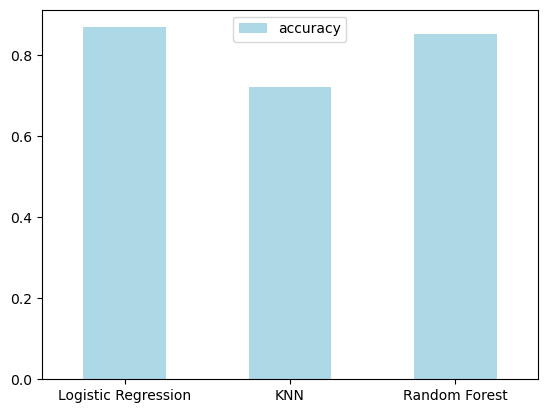

In [21]:
model_compare.T.plot(kind = "bar", color = "lightblue")
plt.xticks(rotation = 0);

# Now we will look at the following:
* Hyperparameter tuning
* Features importance
* Confusion matrix
* Cross-validation matrix
* Precision
* Recall
* F1-Score
* Classification report
* ROC curve
* Area under the curve


In [22]:
# Hyperparameter tuning by hand for KNN model
train_score = []
test_score = []

neighbors = range(1, 21)

# Setting instance of the KNeighbourClassifier
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

max(train_score), max(test_score)

(1.0, 0.7377049180327869)

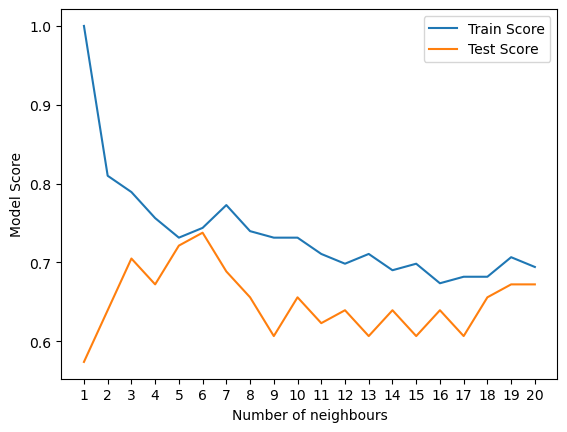

In [23]:
plt.plot(neighbors, train_score, label = "Train Score")
plt.plot(neighbors, test_score, label = "Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

Even with the hyper parameter tuning of the KNN classifier, the max score the model could achieve is 72%. And since we have already defined that only when we achieve a score of 95% during the proof of concept, will we be contuining to pursue the project. Thus, we discard KNN classifier for this Case.

In [24]:
## Hyperparameter tuning using RandomizedSeachCV
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                 "solver": ["liblinear"]}
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
          }
np.random.seed(42)
# Set up random hyperparameter search for logisticReression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5, 
                                n_iter = 20, 
                                verbose = True)
# fitting random hyper parameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 545.5594781168514}

In [26]:
rs_log_reg.score(X_test, y_test)

0.8360655737704918

In [27]:
# setting up random seed

np.random.seed(42)

# set up randomized search for random forest classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)

# Fitting the model
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [28]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [29]:
rs_rf.score(X_test, y_test)

0.8524590163934426

Since the randomForestClassifier gives the best results so for, we will try gridSearchCV to exhaustively search for the best set of parameters for the model

In [30]:
gs_log_reg = GridSearchCV(LogisticRegression(), 
                     param_grid = log_reg_grid,
                     cv = 5,
                     verbose = True)
gs_log_reg.fit(X_train, y_train)

gs_log_reg.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8360655737704918

In [31]:
# gs_rf = GridSearchCV(RandomForestClassifier(), 
#                          param_grid = rf_grid, 
#                          cv = 5,
#                          verbose = True)
# gs_rf.fit(X_train, y_train)

# gs_rf.score(X_test, y_test)

## Evaluating out tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1

to make comparisons and evaluate our trained model,first we need to mak predictions


In [32]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

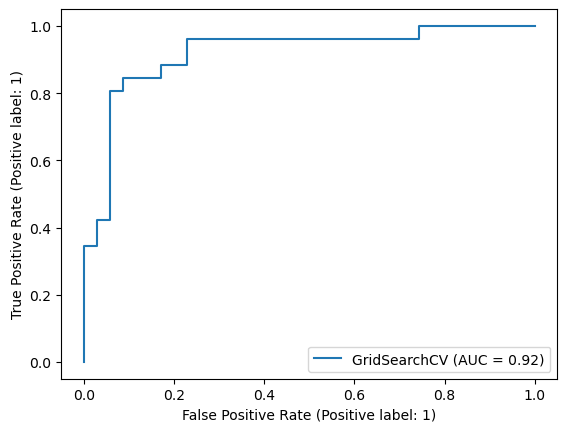

In [33]:
# plot ROC curve and calculates AUC metrics
# IMPORTANT NOTE : plot_roc_curve has been removed from the latest version of sklearn
# plot_roc_curve(gs_log_reg, X_test, y_test)

# use instead: RocCurveDisplay
from sklearn.metrics import RocCurveDisplay
log_reg_disp = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)


In [35]:
confusion_mat = confusion_matrix(y_test, y_preds)

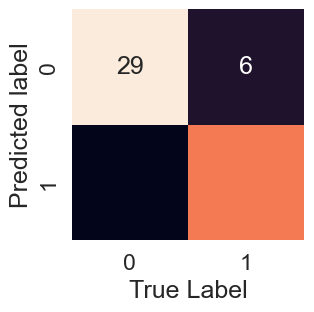

In [36]:
sns.set(font_scale = 1.5)
def plot_sns_plot(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (3, 3))
    ax = sns.heatmap(confusion_mat, 
                    annot = True, 
                    cbar = False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")


plot_sns_plot(y_test, y_preds)

In [38]:
# classification report and cross validated precision, recall and f2-score

classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.88      0.83      0.85        35\n           1       0.79      0.85      0.81        26\n\n    accuracy                           0.84        61\n   macro avg       0.83      0.84      0.83        61\nweighted avg       0.84      0.84      0.84        61\n'

### calculate evaluation matrix using cross validation

We are going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()` . 

In [57]:
# cv_acc = cross_val_score(gs_log_reg, 
#                          X, 
#                          y,
#                          cv = 5,
#                          scoring = "accuracy")
# np.mean(cv_acc)
# what this does is, it creates 100 fits for each fold i.e. total of 100*5 models are created.
# Thus, it is best to instantiate a classifier with the best_params_ of the gridsearchcv.



clf = LogisticRegression(C = 0.615848211066026,
                         solver= "liblinear")
clf.fit(X_train, y_train)
cv_acc = cross_val_score(clf, 
                         X, 
                         y,
                         cv = 5,
                         scoring = "accuracy")
cv_acc = np.mean(cv_acc)

In [58]:
cv_prec = cross_val_score(clf, 
                         X, 
                         y,
                         cv = 5,
                         scoring = "precision")
cv_prec = np.mean(cv_prec)

In [59]:
cv_recall = cross_val_score(clf, 
                         X, 
                         y,
                         cv = 5,
                         scoring = "recall")
cv_recall = np.mean(cv_recall)

In [60]:
cv_f1 = cross_val_score(clf, 
                         X, 
                         y,
                         cv = 5,
                         scoring = "f1")
cv_f1 = np.mean(cv_f1)

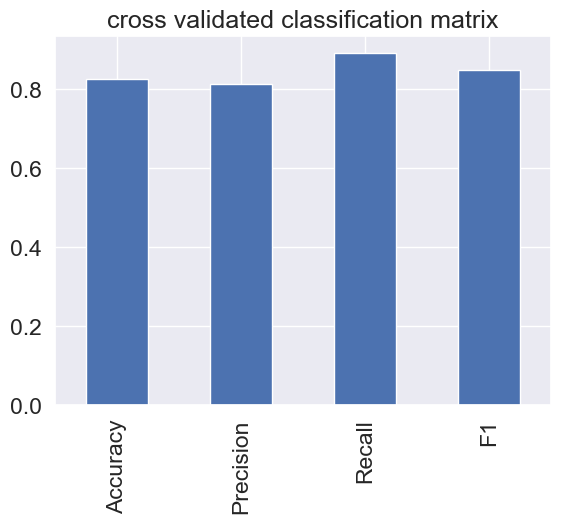

In [61]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc, 
                          "Precision": cv_prec,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index = [0])

cv_metrics.T.plot.bar(title = "cross validated classification matrix",
                     legend = False);

### Feature Importance 

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how dd they contribute"

finding feature importance is different for each machine learning model

In [62]:
clf.coef_

array([[ 0.00702141, -1.16593801,  0.77007835, -0.00584273, -0.00509566,
         0.07878681,  0.40426247,  0.02524723, -0.5241685 , -0.44543433,
         0.5508047 , -0.72376651, -0.8558169 ]])

In [64]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.007021405766406858,
 'sex': -1.165938008714051,
 'cp': 0.7700783459411261,
 'trestbps': -0.0058427333957621645,
 'chol': -0.005095661082442347,
 'fbs': 0.07878681027448538,
 'restecg': 0.40426247284651656,
 'thalach': 0.02524723221039312,
 'exang': -0.5241684975127531,
 'oldpeak': -0.445434334228448,
 'slope': 0.5508046996064738,
 'ca': -0.7237665077916067,
 'thal': -0.8558169015458236}

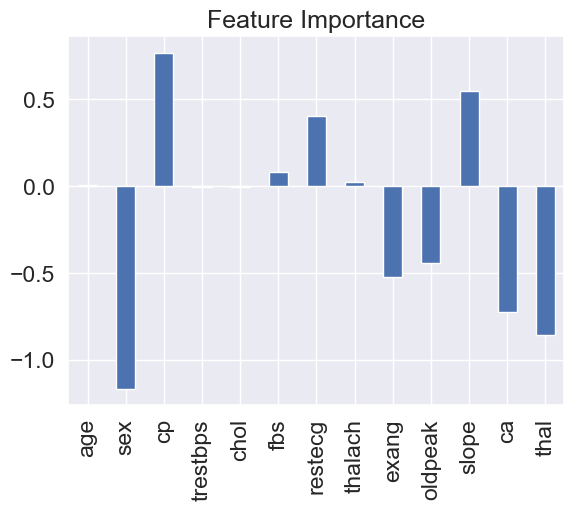

In [65]:
features_df = pd.DataFrame(features_dict, index = [0])
features_df.T.plot.bar(title = "Feature Importance", legend = False);

As from the above chart, it is clear that few of the features (like threstbps, chol and even thalach) do not contribute to the pattern making of the model. Thus, for further enhancement of the model or reducing the complexity of the model, we can ignore these features. 

One of the most important feature with the highest negetive value of correlation coefficient is "sex". This shows that as sex increases (i.e from 0 to 1 or more precisely from being female to being male), the chances of them getting a heart disease decreases.

Similiarly for other features.